In [2]:
import pandas as pd
import datetime
import numpy as np
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import ArcGIS

dam = pd.read_csv('comp_dam_data.csv') # japan damage data
jap = pd.read_csv('jap_data_clean.csv') # japam Earthquake Data
tur = pd.read_csv('tur_data_clean.csv') # Turkey Earthquake Data
dam_t = pd.read_csv('turkey_damage_clean.csv') # Turkey Damage Data

dam = dam.rename(columns = {"Total Damages, Adjusted ('000 US$)" : 'Damage Cost'})
dam_t = dam_t.rename(columns = {"Total Damages, Adjusted ('000 US$)" : 'Damage Cost'})

In [3]:
dam = dam.rename(columns = {"Total Damages, Adjusted ('000 US$)" : 'Damage Cost'})

In [4]:
dam_t = dam_t.rename(columns = {"Total Damages, Adjusted ('000 US$)" : 'Damage Cost'})

# Box plots for Depth distribution in japan and Turkey

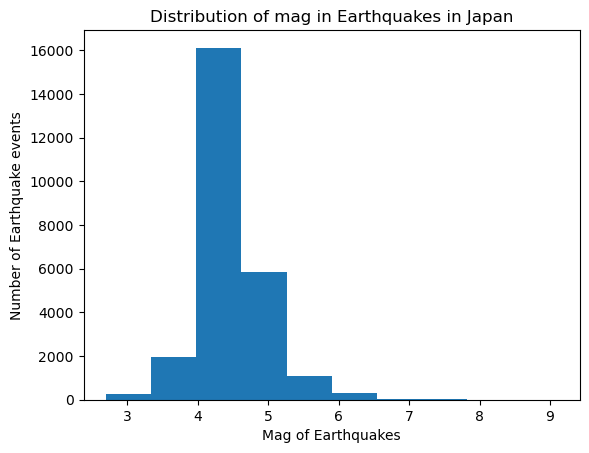

In [12]:
#bins = [0,100,200,300,400,500] 

plt.hist(jap.mag)#, bins = bins)
plt.xlabel('Mag of Earthquakes')
plt.ylabel('Number of Earthquake events')
plt.title('Distribution of mag in Earthquakes in Japan')
#plt.xticks(bins)
plt.savefig('Mag distribution box plot for Japan.')
plt.show()

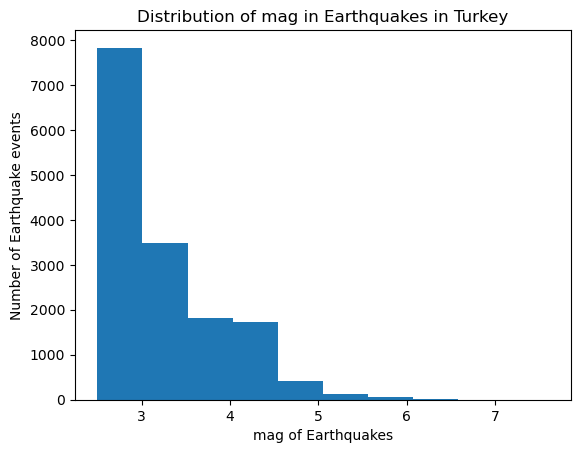

In [13]:
#bins = [0,100,200,300,400,500] 

plt.hist(tur.mag)#, bins = bins)
plt.xlabel('mag of Earthquakes')
plt.ylabel('Number of Earthquake events')
plt.title('Distribution of mag in Earthquakes in Turkey')
#plt.xticks(bins)
plt.savefig('Mag distribution box plot for Turkey.')
plt.show()

### For japan

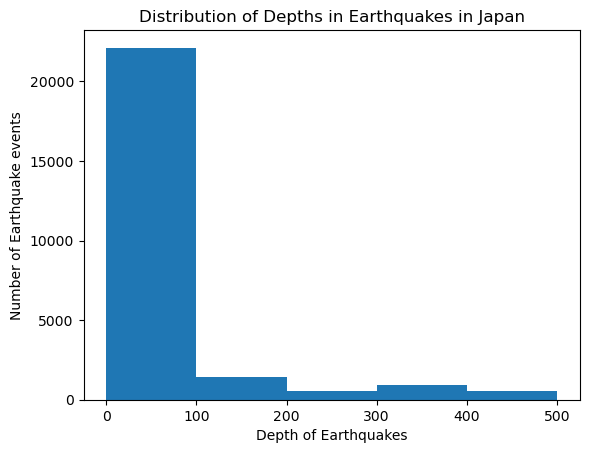

In [17]:
bins = [0,100,200,300,400,500] 

plt.hist(jap.depth, bins = bins)
plt.xlabel('Depth of Earthquakes')
plt.ylabel('Number of Earthquake events')
plt.title('Distribution of Depths in Earthquakes in Japan')
plt.xticks(bins)
plt.savefig('Depth distribution box plot for Japan.')
plt.show()

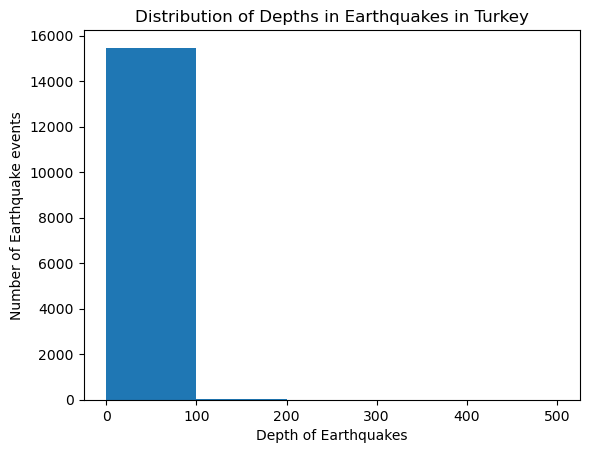

In [18]:
bins = [0,100,200,300,400,500] 

plt.hist(tur.depth, bins = bins)
plt.xlabel('Depth of Earthquakes')
plt.ylabel('Number of Earthquake events')
plt.title('Distribution of Depths in Earthquakes in Turkey')
plt.xticks(bins)
plt.savefig('Depth distribution box plot for Turkey.')
plt.show()

# ====================================

# Average magnitudes by year in Japan and Turkey

In [5]:
line = jap[['year', 'mag']]
line = line.groupby('year').mean()
line = line.reset_index()


line2 = tur[['year', 'mag']]
line2 = line2.groupby('year').mean()
line2 = line2.reset_index()

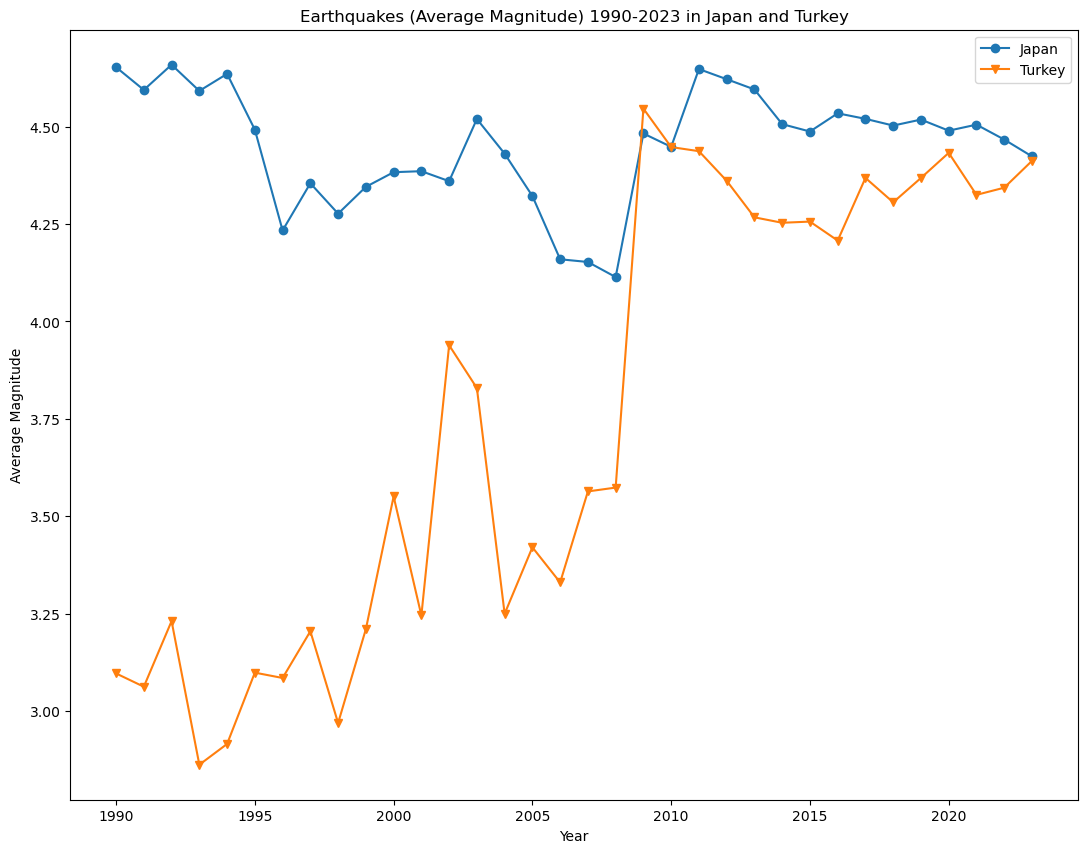

In [7]:
plt.figure(figsize=(13,10))
plt.plot(line.year.values, line.mag.values, 'o-', label = 'Japan')
plt.plot(line2.year.values, line2.mag.values, 'v-', label = 'Turkey')
plt.title('Earthquakes (Average Magnitude) 1990-2023 in Japan and Turkey')
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.legend()

plt.savefig('Average magnitude of earthquakes Japan and Turkey')
plt.show()

# ===================================

# Scatter plot for Earthquakes in JAPAN AND TURKEY

### JAPAN

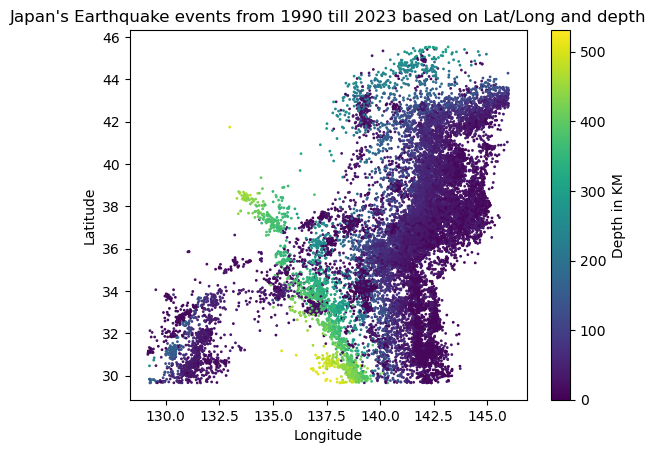

In [20]:
plt.scatter(jap['longitude'], jap['latitude'], s=1, c=jap['depth'], cmap='viridis')
plt.colorbar(label='Depth in KM')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Japan's Earthquake events from 1990 till 2023 based on Lat/Long and depth")
plt.savefig('Earthquake events with depth Japan')
plt.show()

### Turkey

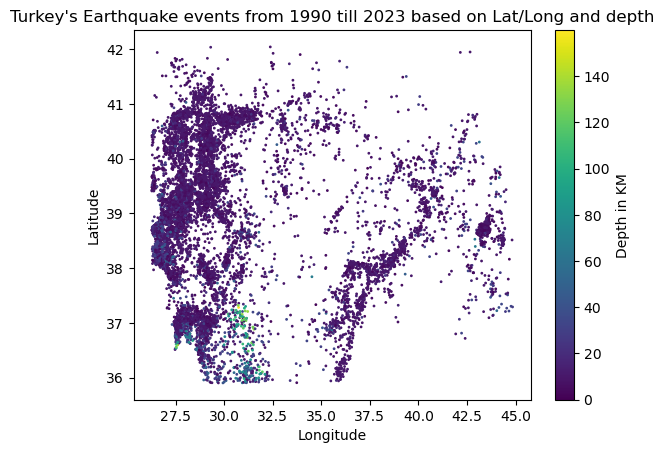

In [21]:
plt.scatter(tur['longitude'], tur['latitude'], s=1, c=tur['depth'], cmap='viridis')
plt.colorbar(label='Depth in KM')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Turkey's Earthquake events from 1990 till 2023 based on Lat/Long and depth")
plt.savefig('Earthquake events with depth Turkey')
plt.show()

# ================================================

# Japan and Turkey 2022 Earthquake map

In [5]:
turkey=ArcGIS()
turkey.geocode("Turkey")
# we got the coordinates using ARC GIS for turkey 

Location(Turkey, (39.066250645000025, 35.142286272000035, 0.0))

In [6]:
japan=ArcGIS()
japan.geocode("japan")
# we got the coordinates using ARC GIS for Japan 

Location(Japan, (36.655226998000046, 139.27149500000007, 0.0))

In [ ]:
jap_map = jap[['year','mag', 'latitude', 'longitude']]
jap_map = jap_map.loc[(jap_map['year'] == 2022)] #| (testdf['year']<=2021)]




### JAPAN MAP

In [7]:
jap_map = jap[['year','mag', 'latitude', 'longitude']]
jap_map = jap_map.loc[(jap_map['year'] == 2022)] 

bins = [0, 2, 3, 4, 5, 6, 7, 8, 9]
colors = ['light green', 'green', 'yellow', 'orange', 'dark orange', 'red', 'purple', 'dark violet']

jap_map['color'] = pd.cut(jap_map['mag'], bins = bins, labels = colors)


maps = folium.Map(location=[36.655226998000046, 139.27149500000007], zoom_start=5)

# add markers to map
for index, row in jap_map.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']], popup = row['mag'], radius=10,
                        color=row['color']).add_to(maps)
    

year_name = '2022 Japan Map'
#jap_map['mag'].value_counts()
#folium.TileLayer(name='2009').add_to(maps)

loc = year_name
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   
maps.get_root().html.add_child(folium.Element(title_html))

maps
#maps.save("MAP JAP 2022.html")
#maps

## Turkey Map

In [11]:
tur_map = tur[['year','mag', 'latitude', 'longitude']]
tur_map = tur_map.loc[(tur_map['year'] == 2022)] #| (testdf['year']<=2021)]


bins = [0, 2, 3, 4, 5, 6, 7, 8, 9]
colors = ['light green', 'green', 'yellow', 'orange', 'dark orange', 'red', 'purple', 'dark violet']

tur_map['color'] = pd.cut(tur_map['mag'], bins = bins, labels = colors)


maps2 = folium.Map(location=[39.066250645000025, 35.142286272000035], zoom_start=5)

# add markers to map
for index, row in tur_map.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']], popup = row['mag'], radius=10,
                        color=row['color']).add_to(maps2)
    

year_name = '2022 Turkey Map'
#jap_map['mag'].value_counts()
#folium.TileLayer(name='2009').add_to(maps)

loc = year_name
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   
maps2.get_root().html.add_child(folium.Element(title_html))

maps2
#maps.save("MAP JAP 2022.html")
#maps

# =====================================

# Damage Data Analysis for japan

In [317]:
dam.columns

Index(['Year', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type',
       'Location', 'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude',
       'Start Year', 'Start Month', 'Start Day', 'Total Deaths', 'No Injured',
       'No Homeless', 'Total Affected', 'Total Damages, Adjusted ('000 US$)'],
      dtype='object')

In [333]:
dam['Dis Mag Value'].value_counts()

Dis Mag Value
7    33
8    12
6    11
5     3
9     1
Name: count, dtype: int64

## Average Deaths per recorded Magnitude in Japan & Turkey

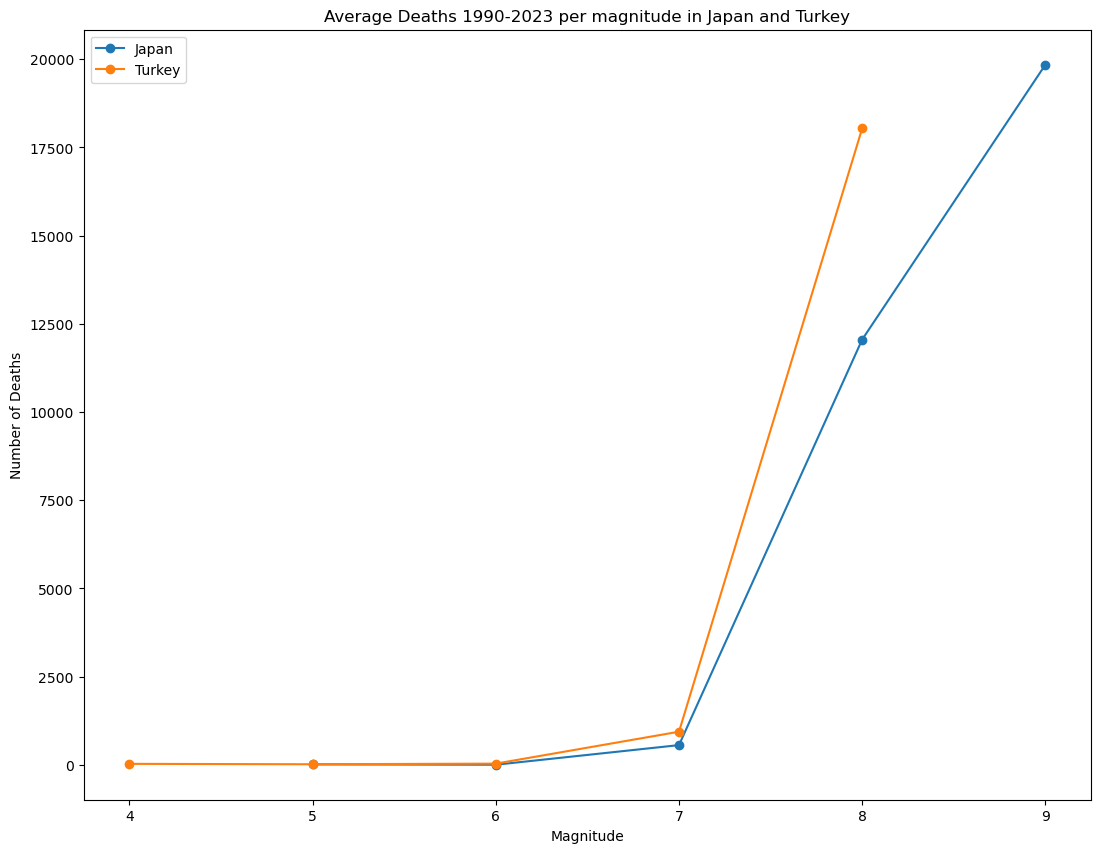

In [19]:
deaths_jap = dam[['Dis Mag Value', 'Total Deaths']]
deaths_jap = deaths_jap.groupby('Dis Mag Value').mean()
deaths_jap = deaths_jap.reset_index()

deaths_tur = dam_t[['Dis Mag Value', 'Total Deaths']]
deaths_tur = deaths_tur.groupby('Dis Mag Value').mean()
deaths_tur = deaths_tur.reset_index()

a = deaths_jap['Dis Mag Value']
b = deaths_jap['Total Deaths']

c = deaths_tur['Dis Mag Value']
d = deaths_tur['Total Deaths']

plt.figure(figsize=(13,10))
plt.plot(a.values, b.values, 'o-', label = 'Japan')
plt.plot(c.values, d.values, 'o-', label = 'Turkey')
plt.xlabel('Magnitude')
plt.ylabel('Number of Deaths')
plt.title('Average Deaths 1990-2023 per magnitude in Japan and Turkey')

plt.legend()

plt.savefig('Average deaths per mag in japan and turkey')
plt.show()

## Average Injured per recorded Magnitude in Japan & Turkey

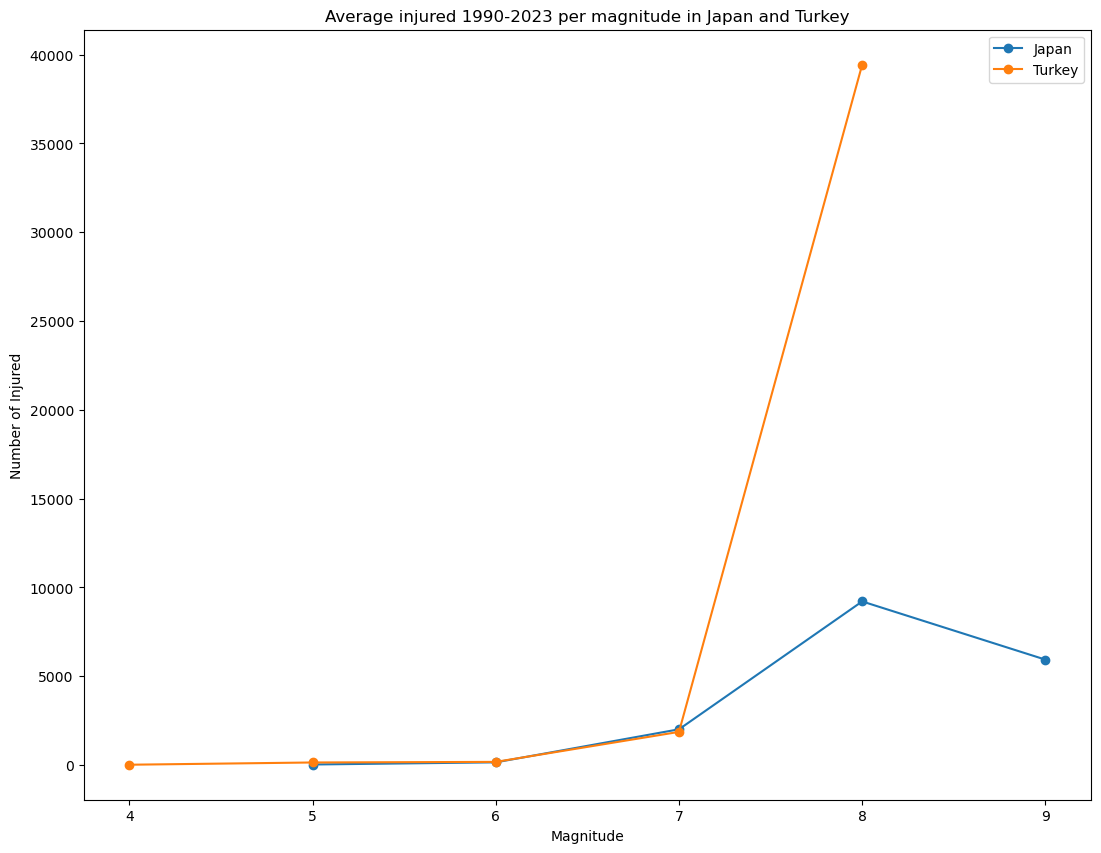

In [20]:
deaths_jap = dam[['Dis Mag Value', 'No Injured']]
deaths_jap = deaths_jap.groupby('Dis Mag Value').mean()
deaths_jap = deaths_jap.reset_index()

deaths_tur = dam_t[['Dis Mag Value', 'No Injured']]
deaths_tur = deaths_tur.groupby('Dis Mag Value').mean()
deaths_tur = deaths_tur.reset_index()

a = deaths_jap['Dis Mag Value']
b = deaths_jap['No Injured']

c = deaths_tur['Dis Mag Value']
d = deaths_tur['No Injured']

plt.figure(figsize=(13,10))
plt.plot(a.values, b.values, 'o-', label = 'Japan')
plt.plot(c.values, d.values, 'o-', label = 'Turkey')
plt.xlabel('Magnitude')
plt.ylabel('Number of Injured')
plt.title('Average injured 1990-2023 per magnitude in Japan and Turkey')

plt.legend()

plt.savefig('Average injured per mag in japan and turkey')
plt.show()

## Average Homeless per recorded Magnitude in Japan & Turkey

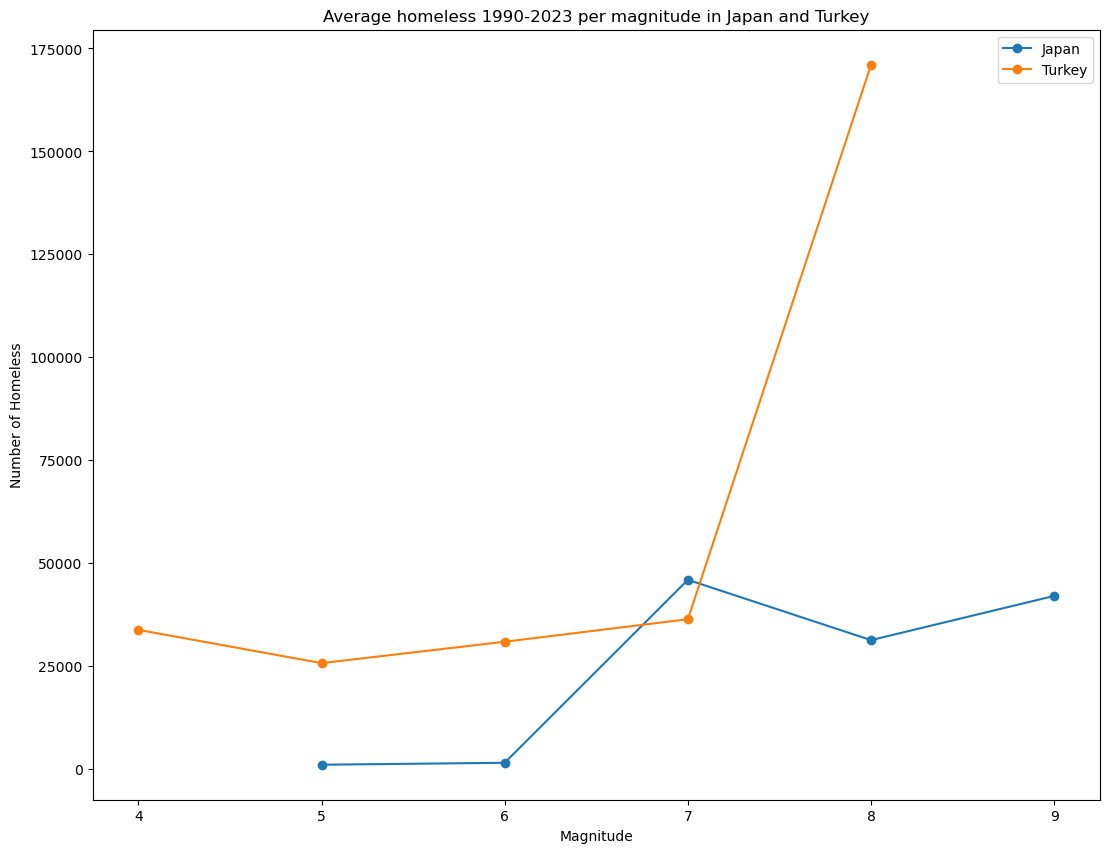

In [21]:
deaths_jap = dam[['Dis Mag Value', 'No Homeless']]
deaths_jap = deaths_jap.groupby('Dis Mag Value').mean()
deaths_jap = deaths_jap.reset_index()

deaths_tur = dam_t[['Dis Mag Value', 'No Homeless']]
deaths_tur = deaths_tur.groupby('Dis Mag Value').mean()
deaths_tur = deaths_tur.reset_index()

a = deaths_jap['Dis Mag Value']
b = deaths_jap['No Homeless']

c = deaths_tur['Dis Mag Value']
d = deaths_tur['No Homeless']

plt.figure(figsize=(13,10))
plt.plot(a.values, b.values, 'o-', label = 'Japan')
plt.plot(c.values, d.values, 'o-', label = 'Turkey')
plt.title('Average homeless 1990-2023 per magnitude in Japan and Turkey')
plt.xlabel('Magnitude')
plt.ylabel('Number of Homeless')

plt.legend()

plt.savefig('Average homeless per mag in japan and turkey')
plt.show()

In [212]:
dam.columns

Index(['Year', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type',
       'Location', 'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude',
       'Start Year', 'Start Month', 'Start Day', 'Total Deaths', 'No Injured',
       'No Homeless', 'Total Affected', 'Damage Cost'],
      dtype='object')

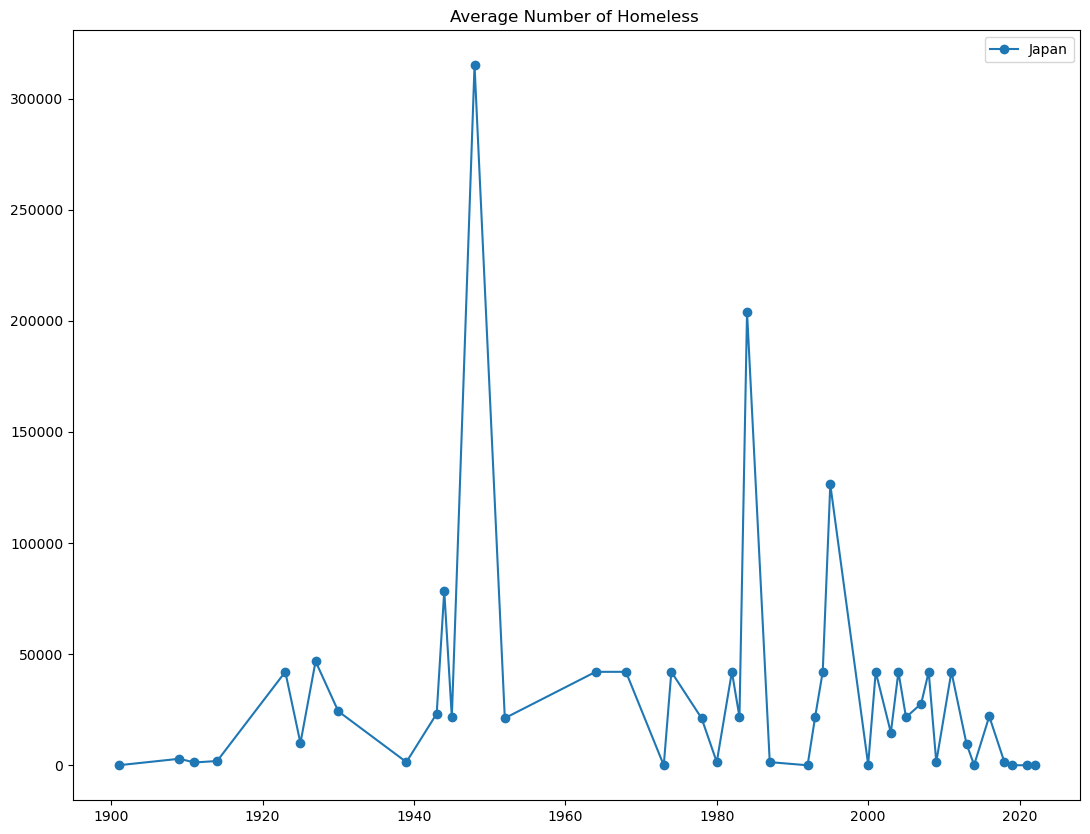

In [361]:
homeless = dam[['Start Year', 'No Homeless']]
homeless = homeless.groupby('Start Year').mean()
homeless = homeless.reset_index()
x = homeless['Start Year']
y = homeless['No Homeless']

plt.figure(figsize=(13,10))
plt.plot(x.values, y.values, 'o-', label = 'Japan')
plt.title('Average Number of Homeless ')

plt.legend()

# Line chart for total injured, homeless, and dead throughout the year FOR JAPAN AND TURKEY

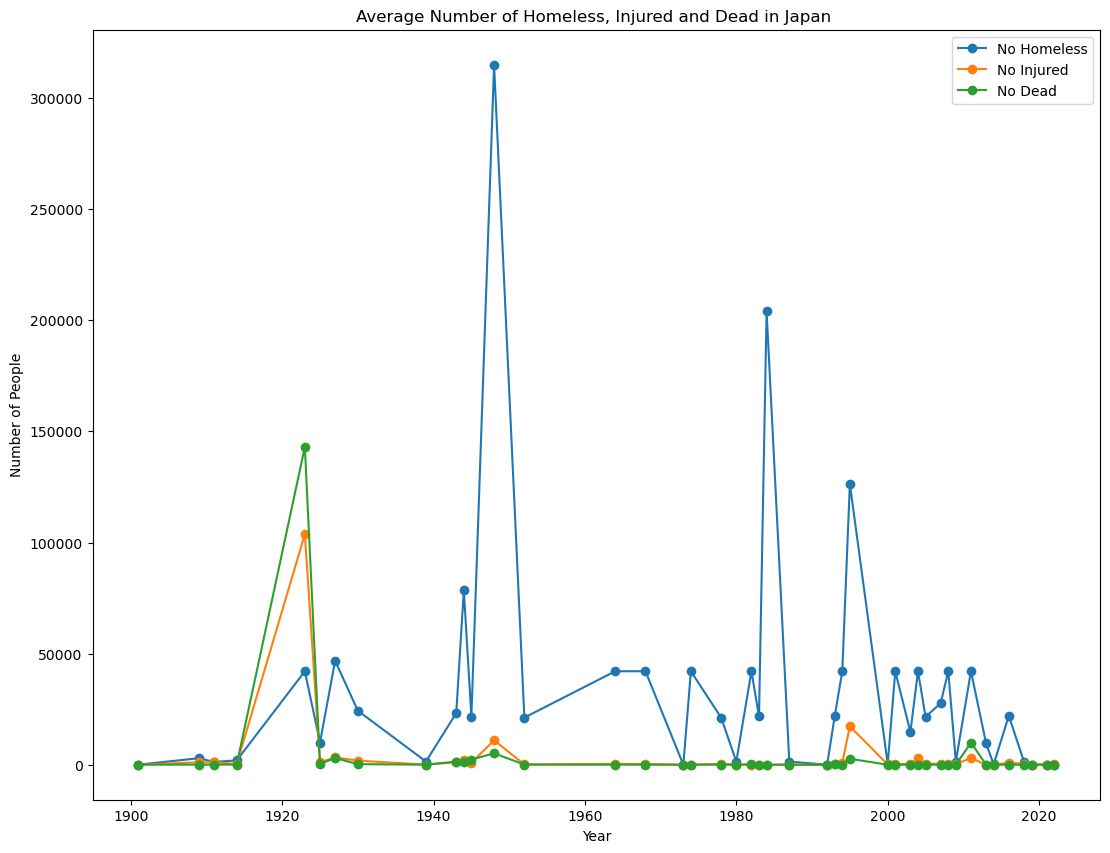

In [12]:
homeless = dam[['Start Year', 'No Homeless']]
injured = dam[['Start Year', 'No Injured']]
dead = dam[['Start Year', 'Total Deaths']]
total = dam[['Start Year', 'Total Affected']]

homeless = homeless.groupby('Start Year').mean()
injured = injured.groupby('Start Year').mean()
dead = dead.groupby('Start Year').mean()
total  = total.groupby('Start Year').mean()

homeless = homeless.reset_index()
injured = injured.reset_index()
dead = dead.reset_index()
total = total.reset_index()


x = homeless['Start Year']
a = homeless['No Homeless']
b = injured['No Injured']
c = dead['Total Deaths']
d = total['Total Affected']

plt.figure(figsize=(13,10))
plt.plot(x.values, a.values, 'o-', label = 'No Homeless')
plt.plot(x.values, b.values, 'o-', label = 'No Injured')
plt.plot(x.values, c.values, 'o-', label = 'No Dead')
#plt.plot(x.values, d.values, 'o-', label = 'No Total')
plt.xlabel('Year')
plt.ylabel('Number of People')

plt.title('Average Number of Homeless, Injured and Dead in Japan ')

plt.legend()
plt.savefig('Avg homeless_injured_dead in Japan_2.png')


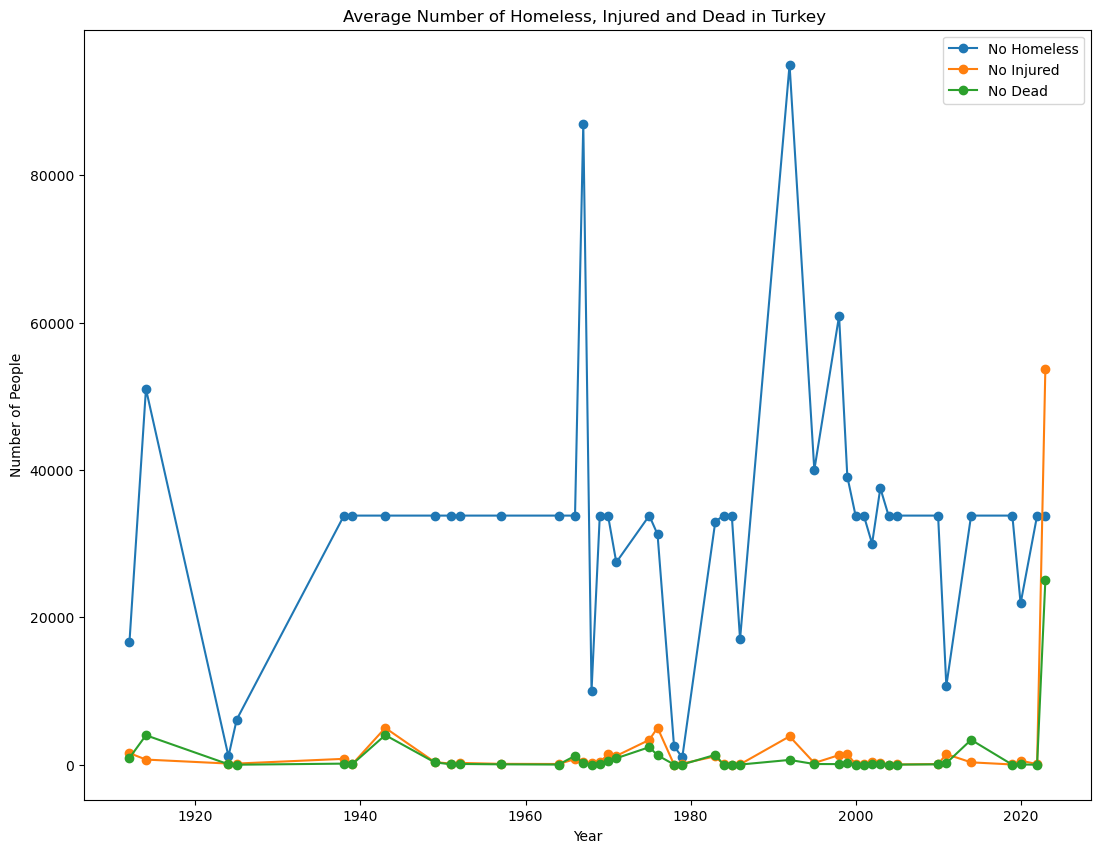

In [95]:
homeless_t = dam_t[['Start Year', 'No Homeless']]
injured_t = dam_t[['Start Year', 'No Injured']]
dead_t = dam_t[['Start Year', 'Total Deaths']]
total_t = dam_t[['Start Year', 'Total Affected']]

homeless_t = homeless_t.groupby('Start Year').mean()
injured_t = injured_t.groupby('Start Year').mean()
dead_t = dead_t.groupby('Start Year').mean()
total_t  = total_t.groupby('Start Year').mean()

homeless_t = homeless_t.reset_index()
injured_t = injured_t.reset_index()
dead_t = dead_t.reset_index()
total_t = total_t.reset_index()


x = homeless_t['Start Year']
a = homeless_t['No Homeless']
b = injured_t['No Injured']
c = dead_t['Total Deaths']
d = total_t['Total Affected']

plt.figure(figsize=(13,10))
plt.plot(x.values, a.values, 'o-', label = 'No Homeless')
plt.plot(x.values, b.values, 'o-', label = 'No Injured')
plt.plot(x.values, c.values, 'o-', label = 'No Dead')
#plt.plot(x.values, d.values, 'o-', label = 'No Total')

plt.xlabel('Year')
plt.ylabel('Number of People')
plt.title('Average Number of Homeless, Injured and Dead in Turkey ')
plt.legend()
plt.savefig('Avg homeless_injured_dead in Turkey_2.png')



# ===================================

# Number of Earthquakes each year Japan vs Turkey

In [3]:
test = jap[['year']] # For Japan
test2 = tur[['year']] # For Turkey

check = test['year'].value_counts() # Counts the value in each year
check = check.sort_index() # Sorts the index as year becomes our index


check2 = test2['year'].value_counts() # Same as above
check2 = check2.sort_index()

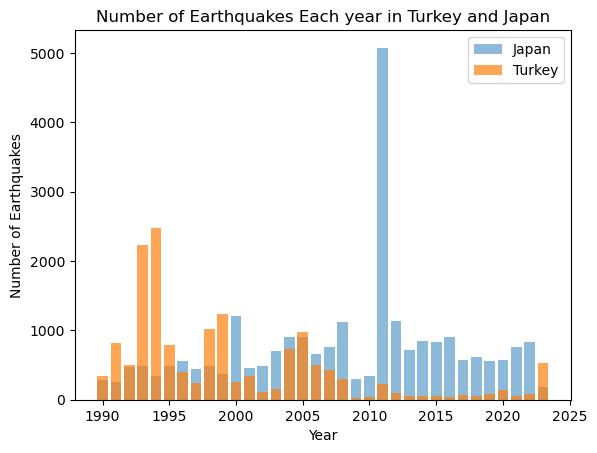

In [4]:
plt.bar(check.index, check.values, alpha = 0.5, label = 'Japan')
plt.bar(check2.index, check2.values, alpha = 0.7, label = 'Turkey')
plt.title('Number of Earthquakes Each year in Turkey and Japan')
plt.xlabel('Year')

plt.ylabel('Number of Earthquakes')
plt.legend()
plt.savefig('Number of Earthquakes in Japan and Turkey.png')

# ===================================

# Which Month has more earethquakes

# Japan

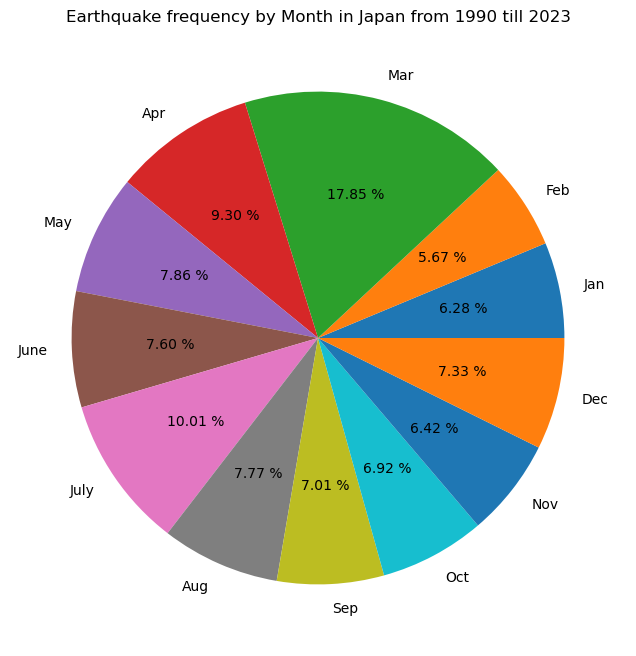

In [175]:
months = jap[['month']] # Make a new df called months, take value of months

# Through .loc seperate month values
jan = months.loc[months['month'] == 1].count()[0]
feb = months.loc[months['month'] == 2].count()[0]
mar = months.loc[months['month'] == 3].count()[0]
apr = months.loc[months['month'] == 4].count()[0]
may = months.loc[months['month'] == 5].count()[0]
jun = months.loc[months['month'] == 6].count()[0]
jul = months.loc[months['month'] == 7].count()[0]
aug = months.loc[months['month'] == 8].count()[0]
sep = months.loc[months['month'] == 9].count()[0]
octo = months.loc[months['month'] == 10].count()[0]
nov = months.loc[months['month'] == 11].count()[0]
dec = months.loc[months['month'] == 12].count()[0]

##########################################################################

# PLotting the pie chart

labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(8, 8))
plt.pie([jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec],
        labels = labels,
       autopct = '%.2f %%') # autopct gives us the percentage of each pie
plt.title('Earthquake frequency by Month in Japan from 1990 till 2023')

plt.savefig('Earthquake Months Japan.png')
plt.show()

# Turkey 

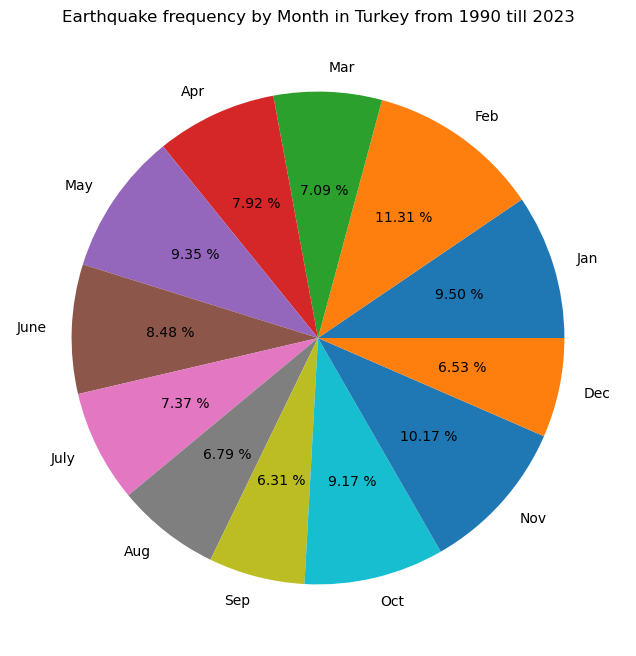

In [174]:
months = tur[['month']] # Make a new df called months, take value of months

# Through .loc seperate month values
jan = months.loc[months['month'] == 1].count()[0]
feb = months.loc[months['month'] == 2].count()[0]
mar = months.loc[months['month'] == 3].count()[0]
apr = months.loc[months['month'] == 4].count()[0]
may = months.loc[months['month'] == 5].count()[0]
jun = months.loc[months['month'] == 6].count()[0]
jul = months.loc[months['month'] == 7].count()[0]
aug = months.loc[months['month'] == 8].count()[0]
sep = months.loc[months['month'] == 9].count()[0]
octo = months.loc[months['month'] == 10].count()[0]
nov = months.loc[months['month'] == 11].count()[0]
dec = months.loc[months['month'] == 12].count()[0]

##########################################################################

# PLotting the pie chart

labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(8, 8))
plt.pie([jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec],
        labels = labels,
       autopct = '%.2f %%') # autopct gives us the percentage of each pie
plt.title('Earthquake frequency by Month in Turkey from 1990 till 2023')


plt.savefig('Earthquake Months Turkey.png')
plt.show()

# ================================

# Corelation

In [25]:
dam.columns

Index(['Year', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type',
       'Location', 'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude',
       'Start Year', 'Start Month', 'Start Day', 'Total Deaths', 'No Injured',
       'No Homeless', 'Total Affected', 'Total Damages, Adjusted ('000 US$)'],
      dtype='object')

<Axes: >

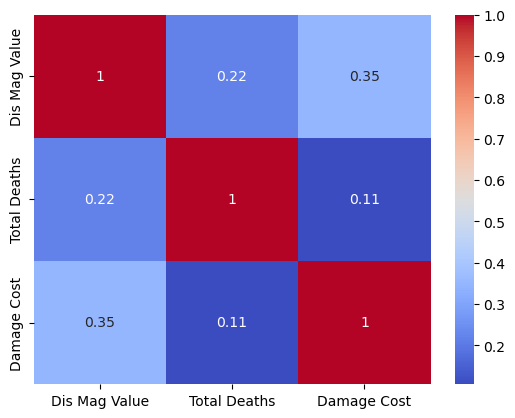

In [144]:
new = dam[['Dis Mag Value', 'Total Deaths', "Damage Cost"]]
data = new
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')




# Between Year and Count of earthquakes

In [115]:
test_jap = jap[['year']] # For Japan
test_tur = tur[['year']] # For Turkey

check_jap = test_jap['year'].value_counts() # Counts the value in each year
check_tur = test_tur['year'].value_counts() # Counts the value in each year

check_jap = check_jap.sort_index() # Sorts the index as year becomes our index
check_tur = check_tur.sort_index() # Sorts the index as year becomes our index

year_jap = check_jap.reset_index()
year_tur = check_tur.reset_index()




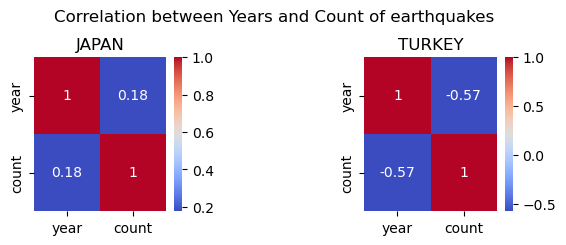

In [169]:
corr_matrix_jap = year_jap.corr()
corr_matrix_tur = year_tur.corr()

plt.subplots_adjust(wspace=1, hspace=0.4)
plt.suptitle('Correlation between Years and Count of earthquakes')

plt.subplot(2,2,1)
sns.heatmap(corr_matrix_jap, annot=True, cmap='coolwarm')
plt.title('JAPAN')

plt.subplot(2,2,2)
sns.heatmap(corr_matrix_tur, annot=True, cmap='coolwarm')
plt.title('TURKEY')


plt.savefig('Heatmap for Count_year correlation')

In [84]:
jap.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'New Time',
       'New Date', 'day', 'month', 'year'],
      dtype='object')

<Axes: >

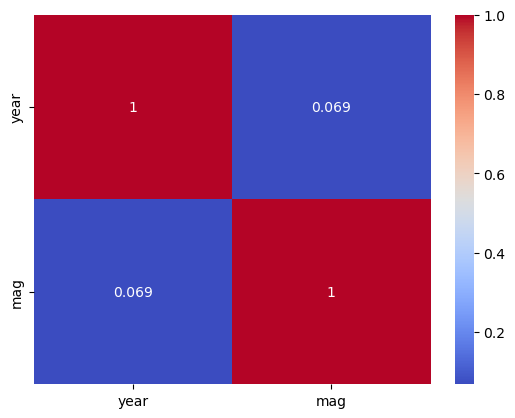

In [91]:
time = jap[['year', 'mag']]
corr_matrix = time.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [151]:
dam.columns

Index(['Year', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type',
       'Location', 'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude',
       'Start Year', 'Start Month', 'Start Day', 'Total Deaths', 'No Injured',
       'No Homeless', 'Total Affected', 'Damage Cost'],
      dtype='object')

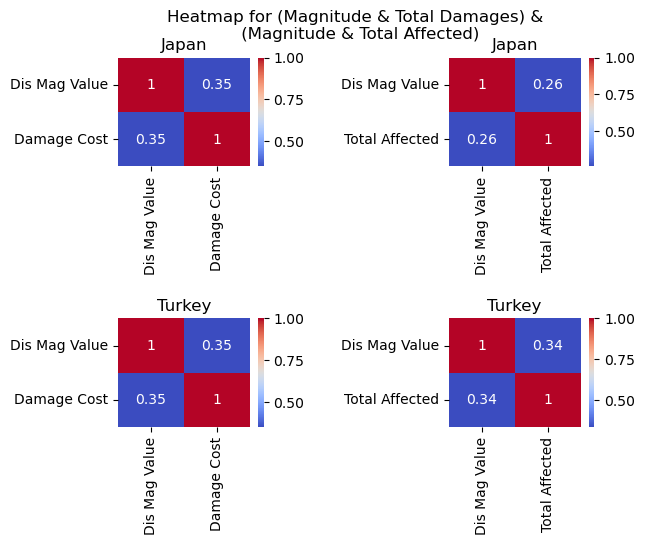

In [22]:
damage_jap = dam[['Dis Mag Value','Damage Cost']]#, "Damage Cost"]]
affected_jap = dam[['Dis Mag Value', 'Total Affected']]

damage_tur = dam_t[['Dis Mag Value','Damage Cost']]#, "Damage Cost"]]
affected_tur = dam_t[['Dis Mag Value', 'Total Affected']]

#########################################

corr_matrix_damage_jap = damage_jap.corr()
corr_matrix_affected_jap = affected_jap.corr()

corr_matrix_damage_tur = damage_tur.corr()
corr_matrix_affected_tur = affected_tur.corr()

############################################

plt.subplots_adjust(wspace=1, hspace=1.4)
plt.suptitle('Heatmap for (Magnitude & Total Damages) & \n (Magnitude & Total Affected)')

############################################
plt.subplot(2,2,1)
sns.heatmap(corr_matrix_damage_jap, annot=True, cmap='coolwarm')
plt.title('Japan')

plt.subplot(2,2,2)
sns.heatmap(corr_matrix_affected_jap, annot=True, cmap='coolwarm')
plt.title('Japan')


################################################

plt.subplot(2,2,3)
sns.heatmap(corr_matrix_damage_tur, annot=True, cmap='coolwarm')
plt.title('Turkey')

plt.subplot(2,2,4)
sns.heatmap(corr_matrix_affected_tur, annot=True, cmap='coolwarm')
plt.title('Turkey')

plt.savefig('Heatmap for Magnitude_Damage_Afffected')
plt.show()

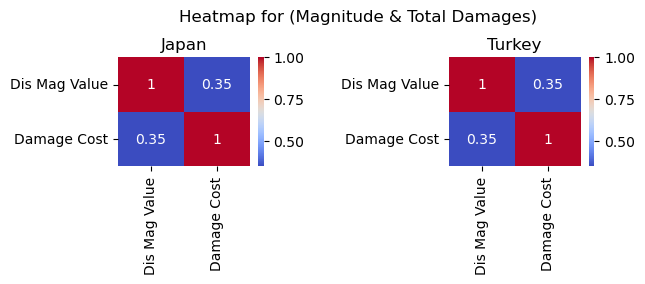

In [31]:
damage_jap = dam[['Dis Mag Value','Damage Cost']]#, "Damage Cost"]]
affected_jap = dam[['Dis Mag Value', 'Total Affected']]

damage_tur = dam_t[['Dis Mag Value','Damage Cost']]#, "Damage Cost"]]
affected_tur = dam_t[['Dis Mag Value', 'Total Affected']]
plt.subplots_adjust(wspace=1, hspace=1.4)

plt.suptitle('Heatmap for (Magnitude & Total Damages)')
corr_matrix_damage_jap = damage_jap.corr()
corr_matrix_affected_jap = affected_jap.corr()
plt.subplot(2,2,1)
sns.heatmap(corr_matrix_damage_jap, annot=True, cmap='coolwarm')
plt.title('Japan')

plt.subplot(2,2,2)
sns.heatmap(corr_matrix_damage_tur, annot=True, cmap='coolwarm')
plt.title('Turkey')
plt.savefig('mag & total damage corr')
plt.show()

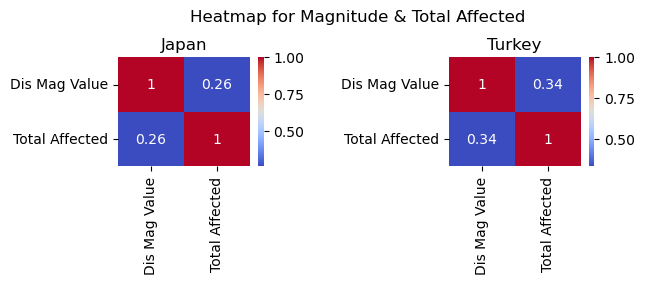

In [33]:
damage_jap = dam[['Dis Mag Value','Damage Cost']]#, "Damage Cost"]]
affected_jap = dam[['Dis Mag Value', 'Total Affected']]

damage_tur = dam_t[['Dis Mag Value','Damage Cost']]#, "Damage Cost"]]
affected_tur = dam_t[['Dis Mag Value', 'Total Affected']]

#########################################

corr_matrix_damage_jap = damage_jap.corr()
corr_matrix_affected_jap = affected_jap.corr()

corr_matrix_damage_tur = damage_tur.corr()
corr_matrix_affected_tur = affected_tur.corr()

############################################

plt.subplots_adjust(wspace=1, hspace=1.4)
plt.suptitle('Heatmap for Magnitude & Total Affected')

############################################
plt.subplot(2,2,1)
sns.heatmap(corr_matrix_affected_jap, annot=True, cmap='coolwarm')
plt.title('Japan')

plt.subplot(2,2,2)
sns.heatmap(corr_matrix_affected_tur, annot=True, cmap='coolwarm')
plt.title('Turkey')


plt.savefig('mag & total affected corr')
plt.show()